# 1. Exploratory Data Analysis

electron neutrinos (signal) from muon neutrinos (background). The first 36499 are electron neutrinos and the 96565 are muon neutrinos

In [118]:
import pandas as pd
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE

In [75]:
path_figures = "./results/figures/"

In [3]:
data = pd.read_csv("./data/MiniBooNE_PID.csv")

In [17]:
# Add label to the dataset, the first 36499 are electron neutrinos and the others 96565 are muon neutrinos
# Seperate neutrinos from electrons and muons
electron = data.head(36499)
muon = data.tail(96565)

del data

electron["neutrino"] = "electron"
muon["neutrino"] = "muon"

data = electron.append(muon) 

### 1.1 Class Distribution

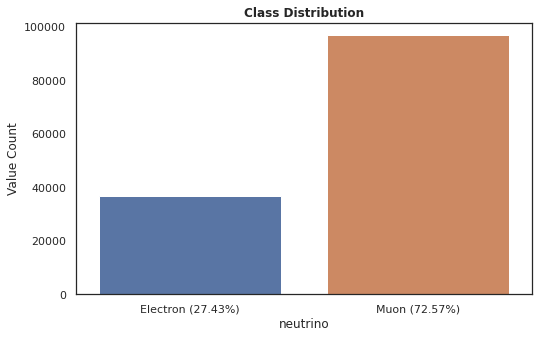

In [139]:
plt.rcParams['figure.figsize'] = [18, 5]

# Obtain Percentages
muon = data['neutrino'].value_counts()[0] / data.shape[0] * 100
electron = data['neutrino'].value_counts()[1] / data.shape[0] * 100

# Plot Training
plt.subplot(1,2,1)
sns.countplot(data['neutrino'])
plt.xticks((0, 1), ['Electron ({0:.2f}%)'.format(electron), 'Muon ({0:.2f}%)'.format(muon)])
plt.ylabel('Value Count')
plt.title("Class Distribution", fontweight="bold")
plt.savefig(path_figures + "Distribution_Classes.jpg")

#### Findings target distribution

<ul>
<li>The data is imbalance that is why we can not rely on accuracy as an optimizing metric. </li>
</ul>

### 1.2 Missing Data

In [36]:
# Whole Data
data.isna().any().any()

False

### 1.3 Correlation Matrix

In [40]:
# Doing this data corr we can observe that there is a lot of correlation with the data
# data.corr()

# 2. Preprocessing

In [44]:
# Preprocessed the data by a scaler in Sklearn
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data.loc[:, data.columns != 'neutrino'])

## 2.1 PCA

### 2.1.1 Choosing number of components

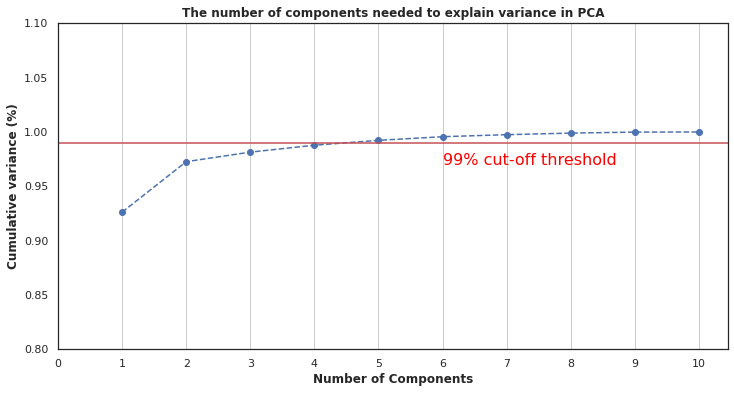

In [114]:
pca = PCA().fit(data_rescaled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)[1:11] # Slicing to see only the first 10 components

plt.ylim(0.8,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components',fontweight="bold")
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)',fontweight="bold")
plt.title('The number of components needed to explain variance in PCA',fontweight="bold")

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(6, 0.97, '99% cut-off threshold', color = 'red', fontsize=16)
plt.savefig(path_figures + "PCA_explain_variance.jpg")
ax.grid(axis='x')
plt.show()

#### Findings of the plot "The number of componenets needed to explain variance in PCA"

<ul>
<li> In order to explain 99% of variance we need to choose 5 components </li>
</ul>

In [116]:
# Thanks to the above plot, we are going to chose 5 components to capture 99% of variance
pca = PCA(n_components = 5)
pca.fit(data_rescaled)
reduced_pca_5 = pca.transform(data_rescaled)

reduced_pca_5 = pd.DataFrame(reduced_pca_5)

In [143]:
path = "./data/reduced_pca_5.csv"
reduced_pca_5.to_csv(path)

### 1.5 Data plot in 2d 

In [103]:
# Creating the PCA with two n_components
pca = PCA(n_components = 2)
pca.fit(data_rescaled)
reduced_pca_2 = pca.transform(data_rescaled)

reduced_pca_2 = pd.DataFrame(reduced_pca_2)

In [104]:
# Add label to the dataset, the first 36499 are electron neutrinos and the others 96565 are muon neutrinos
# Seperate neutrinos from electrons and muons
electron = reduced_pca_2.head(36499)
muon = reduced_pca_2.tail(96565)

del reduced_pca_2

electron["neutrino"] = "electron"
muon["neutrino"] = "muon"

reduced_pca_2 = electron.append(muon) 

In [111]:
reduced_pca_2 = reduced_pca_2[reduced_pca_2[0]<=1] # We filter 6 outliers

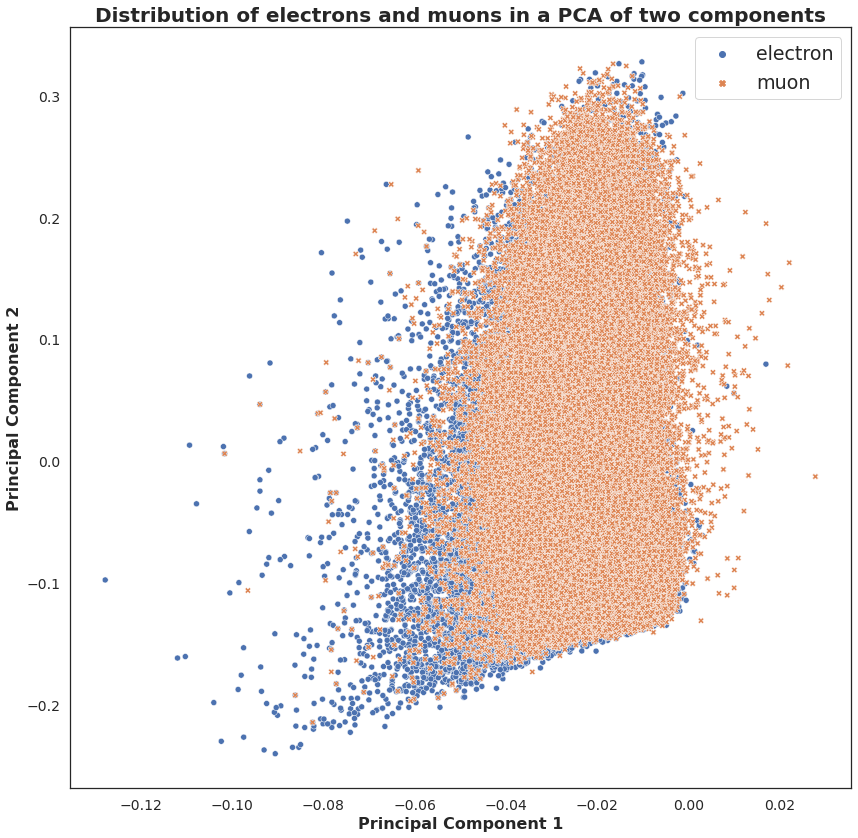

In [119]:
plt.rcParams['figure.figsize'] = [14, 14]
sns.scatterplot(data=reduced_pca_2, x=0, y=1, hue='neutrino', style='neutrino')
plt.xlabel("Principal Component 1", fontsize=16, fontweight="bold")
plt.ylabel("Principal Component 2", fontsize=16, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Distribution of electrons and muons in a PCA of two components", fontsize=20, fontweight="bold")
plt.legend(fontsize=19)
plt.savefig(path_figures + "Distribution_variables_2dPCA.jpg")

## 2.2 TSNE

In [122]:
# tsne = TSNE(n_components=2, random_state=0)
# reduced_tsne = tsne.fit_transform(data_rescaled) 
tsne = TSNE().fit(data_rescaled)

In [132]:
tsne_2dim = tsne.embedding_
tsne_2dim = pd.DataFrame(tsne_2dim)

# Add label to the dataset, the first 36499 are electron neutrinos and the others 96565 are muon neutrinos
# Seperate neutrinos from electrons and muons
electron = tsne_2dim.head(36499)
muon = tsne_2dim.tail(96565)

del tsne_2dim

electron["neutrino"] = "electron"
muon["neutrino"] = "muon"

tsne_2dim = electron.append(muon) 

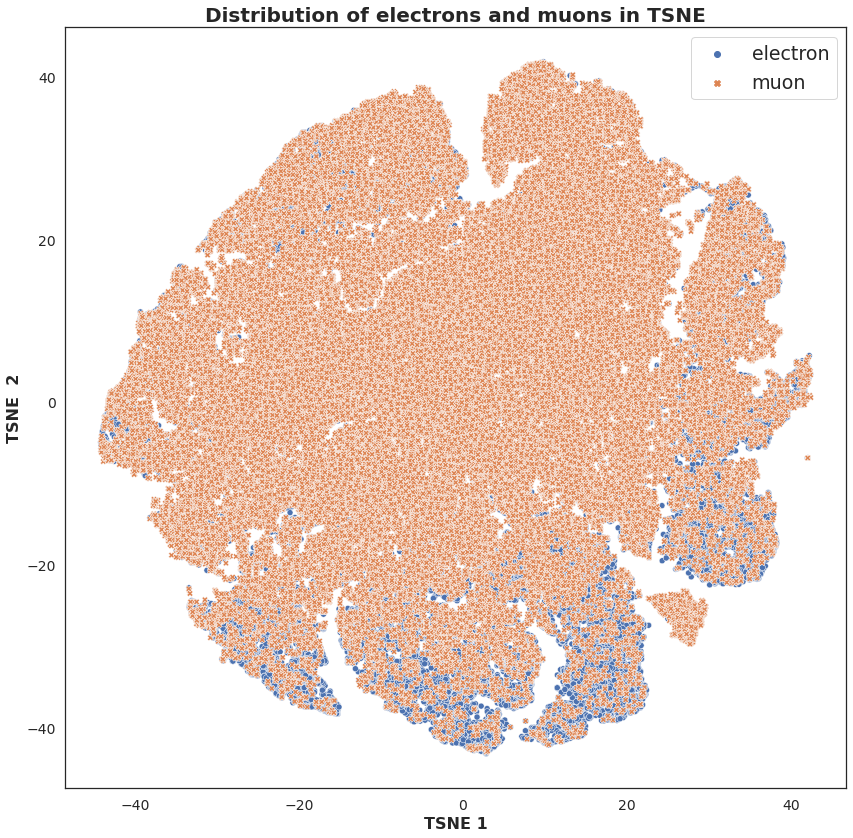

In [134]:
plt.rcParams['figure.figsize'] = [14, 14]
sns.scatterplot(data=tsne_2dim, x=0, y=1, hue='neutrino', style='neutrino')
plt.xlabel("TSNE 1", fontsize=16, fontweight="bold")
plt.ylabel("TSNE  2", fontsize=16, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Distribution of electrons and muons in TSNE", fontsize=20, fontweight="bold")
plt.legend(fontsize=19)
plt.savefig(path_figures + "Distribution_variables_2dTSNE.jpg")